# Importing Libraries

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [2]:
torch.manual_seed(1)

# Class Linear

In [4]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)

In [5]:
model = LR(1, 10)
model(torch.tensor([1.0]))

tensor([ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
         1.0132,  0.1887], grad_fn=<AddBackward0>)

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [7]:
model(torch.tensor([[1.0]]))

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward>)

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [9]:
model(torch.tensor([[1.0], [2.0], [3.0]]))

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.3079, -0.8334, -0.0225,  0.5490, -1.9558,  1.1094, -0.2665,  1.0135,
          1.1522,  0.0663],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward>)

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

# Data Preprepration

In [12]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([[1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [13]:
data_set=Data()

# Create Model

In [14]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
        
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [15]:
model=linear_regression(2,2)

In [16]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [17]:
criterion = nn.MSELoss()

In [18]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

# Train the Model

In [19]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()

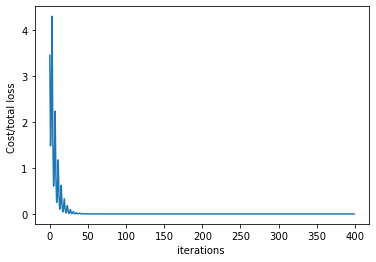

In [20]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()